![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [265]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### How does genre effect worldwide gross?

Does genre_id connect to genre in any other dataframe?

In [266]:
genre_id_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
genre_id_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### genre_id in the genre_id_df does not connect to genre in any  other dataframe that I have available, so I will not use it to correlate genre to worldwide gross.

In [267]:
# creating dataframes from csv's
genre_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
worldwide_gross_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [268]:
#exploring dataframes
genre_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [269]:
title_df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


#### Ensuring that title_df has corresponding movies in genre_df

In [270]:
print(genre_df.loc[genre_df['tconst'] == 'tt9880178'])

           tconst  primary_title original_title  start_year  runtime_minutes  \
145874  tt9880178  The Attention    La atención        2019             61.0   

             genres  
145874  Documentary  


#### Exploring worldwide gross to figure out how to trim to top 100 movies

In [271]:
worldwide_gross_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### Convert worldwide_gross to int

In [272]:
convert_worldwide_gross = worldwide_gross_df
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace(',', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace('$', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].astype(int)
convert_worldwide_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747


#### Trimming wordwide_gross_df to top 100 worldwide gross movies

In [273]:
top_100_gross = convert_worldwide_gross
top_100_gross = top_100_gross.nlargest(100,['worldwide_gross'])
top_100_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864
...,...,...,...,...,...,...
54,55,"May 23, 2014",X-Men: Days of Future Past,"$200,000,000","$233,921,534",747862775
196,97,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,"$145,000,000","$216,391,482",746921271
99,100,"Aug 5, 2016",Suicide Squad,"$175,000,000","$325,100,054",746059887
52,53,"Jun 21, 2013",Monsters University,"$200,000,000","$268,488,329",743588329


#### Joining dataframes to ensure all necessary data is in the same dataframe
* This results in an error - commented out to ease future workflow

In [274]:
#genre_df_join = genre_df
#top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
#top_100_gross.head()

#### Clean up genre_df and maybe top_100_df by searching for duplicates.

In [275]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


##### Considering the entries(146144) equals the Non-Null(146144) for primary_title, I know that I don't need to drop any movies that are listed without a title.

Now, I need to search for the duplicate values in primary_title.

##### Dropping duplicates in primary_title column of genre_df_join

In [276]:
genre_df_join = genre_df
genre_df_join = genre_df_join.drop_duplicates(subset=['primary_title'])
genre_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136071 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           136071 non-null  object 
 1   primary_title    136071 non-null  object 
 2   original_title   136055 non-null  object 
 3   start_year       136071 non-null  int64  
 4   runtime_minutes  106598 non-null  float64
 5   genres           131180 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


#### Left join without the duplicates.

In [277]:
top_100_gross_join = top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross_join.tail(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
49,50,"Jun 30, 2004",Spider-Man 2,"$200,000,000","$373,524,485",795110670,NaN,NaN,NaN,NaN,NaN
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,"$10,500,000","$435,110,554",792965326,NaN,NaN,NaN,NaN,NaN
139,40,"May 24, 2013",Fast and Furious 6,"$160,000,000","$238,679,850",789300444,NaN,NaN,NaN,NaN,NaN
24,25,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,"$230,000,000","$172,558,876",788241137,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,129.0,"Action,Adventure,Fantasy"
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,"$178,000,000","$220,159,104",787456552,NaN,NaN,NaN,NaN,NaN
314,15,"May 18, 2018",Deadpool 2,"$110,000,000","$324,591,735",786680557,tt5463162,Deadpool 2,2018.0,119.0,"Action,Adventure,Comedy"
75,76,"May 22, 2008",Indiana Jones and the Kingdom of the Crystal S...,"$185,000,000","$317,101,119",786635413,NaN,NaN,NaN,NaN,NaN
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,"$11,000,000","$460,998,007",786598007,NaN,NaN,NaN,NaN,NaN
113,14,"Aug 1, 2014",Guardians of the Galaxy,"$170,000,000","$333,172,112",770867516,tt2015381,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy"
264,65,"May 19, 2006",The Da Vinci Code,"$125,000,000","$217,536,138",767820459,NaN,NaN,NaN,NaN,NaN


#### Great! Now, were all 100 movies joined?

In [278]:
top_100_gross_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   release_date       100 non-null    object 
 2   movie              100 non-null    object 
 3   production_budget  100 non-null    object 
 4   domestic_gross     100 non-null    object 
 5   worldwide_gross    100 non-null    int64  
 6   tconst             62 non-null     object 
 7   original_title     62 non-null     object 
 8   start_year         62 non-null     float64
 9   runtime_minutes    59 non-null     float64
 10  genres             61 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.4+ KB


#### Yes, they were, however only 61 of the movies have genre data. Should I figure out how to pull the top 100 movies with genre data, or add genre data to 39 movies?

In [279]:
print(top_100_gross_join.loc[top_100_gross_join['genres'] == 'NaN'])

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross, tconst, original_title, start_year, runtime_minutes, genres]
Index: []


In [280]:
top_100_gross_join['genres'].isnull().values.sum()

39

In [281]:
missing_genre = pd.isnull(top_100_gross_join['genres'])
top_100_gross_join[missing_genre]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,NaN,NaN,NaN,NaN,NaN
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,"$94,000,000","$377,845,905",1141403341,NaN,NaN,NaN,NaN,NaN
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812",1066215812,NaN,NaN,NaN,NaN,NaN
824,25,"Jun 11, 1993",Jurassic Park,"$63,000,000","$395,708,305",1038812584,NaN,NaN,NaN,NaN,NaN
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677",1027044677,NaN,NaN,NaN,NaN,NaN
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000","$533,720,947",1001996207,NaN,NaN,NaN,NaN,NaN
262,63,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,"$125,000,000","$317,871,467",975047606,NaN,NaN,NaN,NaN,NaN
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425",963420425,NaN,NaN,NaN,NaN,NaN


In [282]:
print(genre_df.loc[genre_df['primary_title'] == 'Coco'])

            tconst primary_title original_title  start_year  runtime_minutes  \
5231    tt10453328          Coco           Coco        2018              NaN   
38424    tt2380307          Coco           Coco        2017            105.0   
117464   tt7002100          Coco           Coco        2017             98.0   

                            genres  
5231                           NaN  
38424   Adventure,Animation,Comedy  
117464                      Horror  


#### Now, I see that there are many movies with the same name in the genre_df and this is causing issues.  
* Clearly, Coco should be returning as the tconst tt2380307, rather than the tt10453328.   
* So, I am going to try joining the title_df to the top_100_join as titles_df_join before joining that dataframe with genre_df_join.

In [283]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [284]:
title_df_join = title_df
title_df_join = title_df.drop_duplicates(subset=['title'])
title_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252781 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           252781 non-null  object 
 1   ordering           252781 non-null  int64  
 2   title              252781 non-null  object 
 3   region             221956 non-null  object 
 4   language           32890 non-null   object 
 5   types              120946 non-null  object 
 6   attributes         12527 non-null   object 
 7   is_original_title  252763 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 17.4+ MB


In [285]:
title_df_join = top_100_gross.join(title_df_join.set_index(['title'], verify_integrity=True), on='movie', how='left')
title_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   release_date       100 non-null    object 
 2   movie              100 non-null    object 
 3   production_budget  100 non-null    object 
 4   domestic_gross     100 non-null    object 
 5   worldwide_gross    100 non-null    int64  
 6   title_id           62 non-null     object 
 7   ordering           62 non-null     float64
 8   region             46 non-null     object 
 9   language           9 non-null      object 
 10  types              44 non-null     object 
 11  attributes         2 non-null      object 
 12  is_original_title  62 non-null     float64
dtypes: float64(2), int64(2), object(9)
memory usage: 10.9+ KB


#### Sadly, the title_id column (62 non-null) will not net us much more reliable data than using the titles to join between top_100_df (61 non-null) and genre_df. 

* So, I think I will clean up the top_100_join dataframe by manually checking and changing the relevant movies.

* In order to cut down on some of the work, I will cut it down to the top 50 grossing movies.

#### trimming wordwide_gross_df to top 50 worldwide gross movies

In [286]:
top_50_gross = convert_worldwide_gross
top_50_gross = top_100_gross.nlargest(50,['worldwide_gross'])
top_50_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864


#### Join top_50_gross to genre_df_join

In [287]:
top_50_gross_join = top_50_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Horror
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Adventure
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN


In [288]:
#reset top_50_gross_join index
#top_50_gross_join.reset_index(drop=True, inplace=True)
#top_50_gross_join

#### Find and replace NaN and incorrect genres

In [289]:
missing_genre_50 = pd.isnull(top_50_gross_join['genres'])
missing_genre = top_50_gross_join[missing_genre_50]
missing_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,NaN,NaN,NaN,NaN,NaN
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,"$94,000,000","$377,845,905",1141403341,NaN,NaN,NaN,NaN,NaN
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812",1066215812,NaN,NaN,NaN,NaN,NaN
824,25,"Jun 11, 1993",Jurassic Park,"$63,000,000","$395,708,305",1038812584,NaN,NaN,NaN,NaN,NaN
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677",1027044677,NaN,NaN,NaN,NaN,NaN
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000","$533,720,947",1001996207,NaN,NaN,NaN,NaN,NaN
262,63,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,"$125,000,000","$317,871,467",975047606,NaN,NaN,NaN,NaN,NaN
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425",963420425,NaN,NaN,NaN,NaN,NaN


In [290]:
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Horror
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Adventure
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN


In [291]:
top_50_gross_join.loc[0,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[42,'genres'] = "Drama,Romance"
top_50_gross_join.loc[5,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[260,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[4,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[425,'genres'] = "Action,Adventure,Drama"
top_50_gross_join.loc[27,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[824,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[303,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[74,'genres'] = "Action,Crime,Drama"
top_50_gross_join.loc[262,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[7,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[263,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[157,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[692,'genres'] = "Animation,Adventure,Comedy"
top_50_gross_join.loc[424,'genres'] = "Animation,Adventure,Comedy"
top_50_gross_join




,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"Drama,Romance"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"Adventure,Fantasy,Mystery"


#### Check if all movies have a genre. 
* They do all have a genre.

In [292]:
top_50_gross_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     int64  
 1   release_date       50 non-null     object 
 2   movie              50 non-null     object 
 3   production_budget  50 non-null     object 
 4   domestic_gross     50 non-null     object 
 5   worldwide_gross    50 non-null     int64  
 6   tconst             36 non-null     object 
 7   original_title     36 non-null     object 
 8   start_year         36 non-null     float64
 9   runtime_minutes    34 non-null     float64
 10  genres             50 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.2+ KB


#### Use pandas explode to make a unique row for each genre.

In [310]:
top_50_gross_join_backup = top_50_gross_join 
top_50_gross_join_backup

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"Drama,Romance"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"Adventure,Fantasy,Mystery"


In [259]:
top_50_gross_join['genres'] = top_50_gross_join['genres'].str.split(',')
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"[Drama, Romance]"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"[Action, Adventure, Sci-Fi]"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"[Action, Crime, Thriller]"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"[Action, Adventure, Sci-Fi]"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"[Adventure, Fantasy, Mystery]"


In [260]:
top_50_gross_join_explode = top_50_gross_join_split.explode('genres')
top_50_gross_join_explode

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Action
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Adventure
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Fantasy
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Drama
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Romance
...,...,...,...,...,...,...,...,...,...,...,...
692,93,"May 19, 2004",Shrek 2,"$70,000,000","$441,226,247",937008132,NaN,NaN,NaN,NaN,Adventure
692,93,"May 19, 2004",Shrek 2,"$70,000,000","$441,226,247",937008132,NaN,NaN,NaN,NaN,Comedy
424,25,"May 30, 2003",Finding Nemo,"$94,000,000","$380,529,370",936429370,NaN,NaN,NaN,NaN,Animation
424,25,"May 30, 2003",Finding Nemo,"$94,000,000","$380,529,370",936429370,NaN,NaN,NaN,NaN,Adventure


#### Making the Histogram of Genre's for Top 50 Grossing Movies

(-1.0, 13.0)

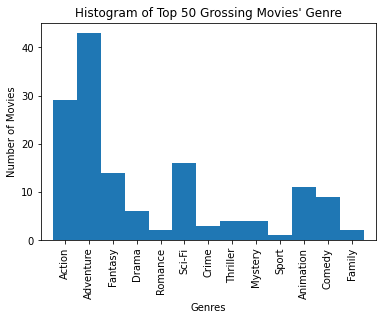

In [327]:
plt.hist(top_50_gross_join_explode['genres'], bins=np.arange(14) - 0.5)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title(r"Histogram of Top 50 Grossing Movies' Genre")
plt.xticks(rotation = 90)
plt.xticks(range(13))
plt.xlim([-1,13])

In [324]:
top_50_gross_join.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"Drama,Romance"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"


(-1.0, 19.0)

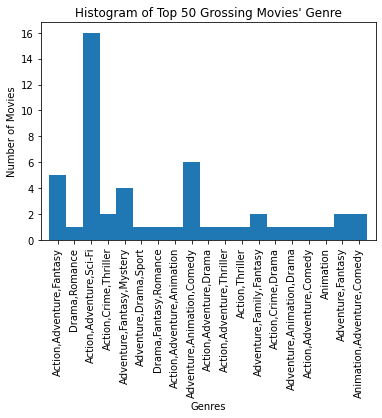

In [326]:
plt.hist(top_50_gross_join['genres'], bins=np.arange(20)-0.5)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title(r"Histogram of Top 50 Grossing Movies' Genre")
plt.xticks(rotation = 90)
plt.xticks(range(19))
plt.xlim([-1,19])


#### Conclusion: 
* Combining Action and Adventure genres with Fantasy or Sci-Fi results in movies with the highest worldwide gross.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [ ]:
![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### How does genre effect worldwide gross?

Does genre_id connect to genre in any other dataframe?

genre_id_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
genre_id_df

#### genre_id in the genre_id_df does not connect to genre in any  other dataframe that I have available, so I will not use it to correlate genre to worldwide gross.

# creating dataframes from csv's
genre_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
worldwide_gross_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

#exploring dataframes
genre_df

title_df

#### Ensuring that title_df has corresponding movies in genre_df

print(genre_df.loc[genre_df['tconst'] == 'tt9880178'])

#### Exploring worldwide gross to figure out how to trim to top 100 movies

worldwide_gross_df

#### Convert worldwide_gross to int

convert_worldwide_gross = worldwide_gross_df
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace(',', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace('$', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].astype(int)
convert_worldwide_gross.head()

#### Trimming wordwide_gross_df to top 100 worldwide gross movies

top_100_gross = convert_worldwide_gross
top_100_gross = top_100_gross.nlargest(100,['worldwide_gross'])
top_100_gross

#### Joining dataframes to ensure all necessary data is in the same dataframe

genre_df_join = genre_df
top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross.head()

#### Clean up genre_df and maybe top_100_df by searching for duplicates.

genre_df.info()

##### Considering the entries(146144) equals the Non-Null(146144) for primary_title, I know that I don't need to drop any movies that are listed without a title.

Now, I need to search for the duplicate values in primary_title.

##### Dropping duplicates in primary_title column of genre_df_join

genre_df_join = genre_df
genre_df_join = genre_df_join.drop_duplicates(subset=['primary_title'])
genre_df_join.info()

#### Left join without the duplicates.

top_100_gross_join = top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross_join.tail(20)

#### Great! Now, were all 100 movies joined?

top_100_gross_join.info()

#### Yes, they were, however only 61 of the movies have genre data. Should I figure out how to pull the top 100 movies with genre data, or add genre data to 39 movies?

print(top_100_gross_join.loc[top_100_gross_join['genres'] == 'NaN'])

top_100_gross_join['genres'].isnull().values.sum()

missing_genre = pd.isnull(top_100_gross_join['genres'])
top_100_gross_join[missing_genre]

print(genre_df.loc[genre_df['primary_title'] == 'Coco'])

#### Now, I see that there are many movies with the same name in the genre_df and this is causing issues.  
* Clearly, Coco should be returning as the tconst tt2380307, rather than the tt10453328.   
* So, I am going to try joining the title_df to the top_100_join as titles_df_join before joining that dataframe with genre_df_join.

title_df.info()

title_df_join = title_df
title_df_join = title_df.drop_duplicates(subset=['title'])
title_df_join.info()

title_df_join = top_100_gross.join(title_df_join.set_index(['title'], verify_integrity=True), on='movie', how='left')
title_df_join.info()

#### Sadly, the title_id column (62 non-null) will not net us much more reliable data than using the titles to join between top_100_df (61 non-null) and genre_df. 

* So, I think I will clean up the top_100_join dataframe by manually checking and changing the relevant movies.

* In order to cut down on some of the work, I will cut it down to the top 50 grossing movies.

#### trimming wordwide_gross_df to top 50 worldwide gross movies

top_50_gross = convert_worldwide_gross
top_50_gross = top_100_gross.nlargest(50,['worldwide_gross'])
top_50_gross.head()

#### Join top_50_gross to genre_df_join

top_50_gross_join = top_50_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_50_gross_join

#### Find and replace NaN and incorrect genres

missing_genre_50 = pd.isnull(top_50_gross_join['genres'])
missing_genre = top_50_gross_join[missing_genre_50]
missing_genre

missing_genre.at[5,'genres'] == "Action,Adventure,Sci-Fi"
missing_genre

##### 14 movie genres to add - I can do this.

missing_genre_replaced = missing_genre["genres"].replace"Action,Adventure,Sci-Fi", "Adventure,Fantasy,Mystery"]})
missing_genre_replaced


replace_val_top_50 = top_50_gross_join
replace_val_top_50.replace(to_replace=)

I am pausing and coming back to this - now I am going to start making the histogram.

#### Making the Histogram of Genre's for Top 50 Grossing Movies

genre_columns = top_50_gross_join
values = True if 'Adventure' in genre_columns['genres']
        Else:
            return False
genre_columns['Adventure'] = values
genre_columns

top_50_gross_join.info()

fig, ax = plt.hist(top_50_gross_join['genres'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***